## 一、原理介绍

热力图，又名相关系数图。根据热力图中不同方块颜色对应的相关系数的大小，可以判断出变量之间相关性的大小。两个变量之间相关系数的计算公式为:

$$\rho _{_{X_{1}X_{2}}}=\frac{Cov(X_{1},X_{2})}{\sqrt{DX_{1},DX_{2} }}=\frac{EX_{1}X_{2}-EX_{1}\ast EX_{2}}{\sqrt{DX_{1}\ast DX_{2} }}$$
公式中，$\rho$ 表示相关系数，Cov表示协方差,E表示数学期望/均值

值得注意的是，该相关系数只能度量出变量之间的线性相关关系；也就是说，相关系数越高，则变量间的线性相关程度越高。对于相关系数小的两个变量，只能说明变量间的线性相关程度弱，但不能说明变量之间不存在其它的相关关系，如曲线关系等。

## 二、代码实现

数据来源于2016年的上市企业数据，通过绘制热力图，来探究上市企业各指标之间的相关性，进而探究自变量之间的多重共线性以及各变量与企业违约率之间的相关关系强弱。以下是代码的实现过程：

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #过滤掉警告的意思
from pyforest import *

In [2]:
data=pd.read_csv("F:/data/cor.csv",encoding='gbk')
data.head()

<IPython.core.display.Javascript object>

,年份,证券简称,资产负债率,剔除预收款项后的资产负债率,长期资本负债率,长期资产适合率,权益乘数,流动负债权益比率,带息债务/全部投入资本,流动负债/负债合计,资本固定化比率,期望违约频率EDF
0,2016,珠江实业,0.712906,0.635345,0.478982,0.504892,0.901718,0.491299,0.391437,0.148517,0.475540,0.000000
1,2016,珠江控股,0.605648,0.490110,0.570861,0.492015,0.130525,0.000000,0.445324,0.641538,0.720305,0.428899
2,2016,中洲控股,0.670881,0.615495,0.530650,0.499621,0.835539,0.463341,0.355513,0.338676,0.484446,0.991604
3,2016,中天金融,0.678323,0.588974,0.445639,0.495032,0.851713,0.492647,0.407492,0.093949,0.509239,0.999601
4,2016,中体产业,0.800410,0.783033,0.901929,0.502632,0.955745,0.508000,0.093838,0.571239,0.462344,0.792590


In [3]:
#图片显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
data.drop(['证券简称','年份'], axis=1, inplace=True) #删除无关的列

In [6]:
#计算各变量之间的相关系数
corr = data.corr()
corr

,资产负债率,剔除预收款项后的资产负债率,长期资本负债率,长期资产适合率,权益乘数,流动负债权益比率,带息债务/全部投入资本,流动负债/负债合计,资本固定化比率,期望违约频率EDF
资产负债率,1.000000,0.594527,0.492963,-0.160995,0.723664,0.658646,-0.857474,0.320706,-0.284634,-0.091423
剔除预收款项后的资产负债率,0.594527,1.000000,0.724546,-0.099318,0.540639,0.492140,-0.554039,0.171270,-0.265259,0.068577
长期资本负债率,0.492963,0.724546,1.000000,-0.091338,0.450542,0.375839,-0.524955,0.300627,-0.198362,0.033209
长期资产适合率,-0.160995,-0.099318,-0.091338,1.000000,-0.049872,-0.028452,0.157157,0.009742,-0.162374,0.155095
权益乘数,0.723664,0.540639,0.450542,-0.049872,1.000000,0.951933,-0.651767,0.079052,-0.535984,0.007980
流动负债权益比率,0.658646,0.492140,0.375839,-0.028452,0.951933,1.000000,-0.543147,-0.106139,-0.522320,0.011466
带息债务/全部投入资本,-0.857474,-0.554039,-0.524955,0.157157,-0.651767,-0.543147,1.000000,-0.595016,0.310521,0.066397
流动负债/负债合计,0.320706,0.171270,0.300627,0.009742,0.079052,-0.106139,-0.595016,1.000000,-0.105199,-0.064886
资本固定化比率,-0.284634,-0.265259,-0.198362,-0.162374,-0.535984,-0.522320,0.310521,-0.105199,1.000000,-0.080153
期望违约频率EDF,-0.091423,0.068577,0.033209,0.155095,0.007980,0.011466,0.066397,-0.064886,-0.080153,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

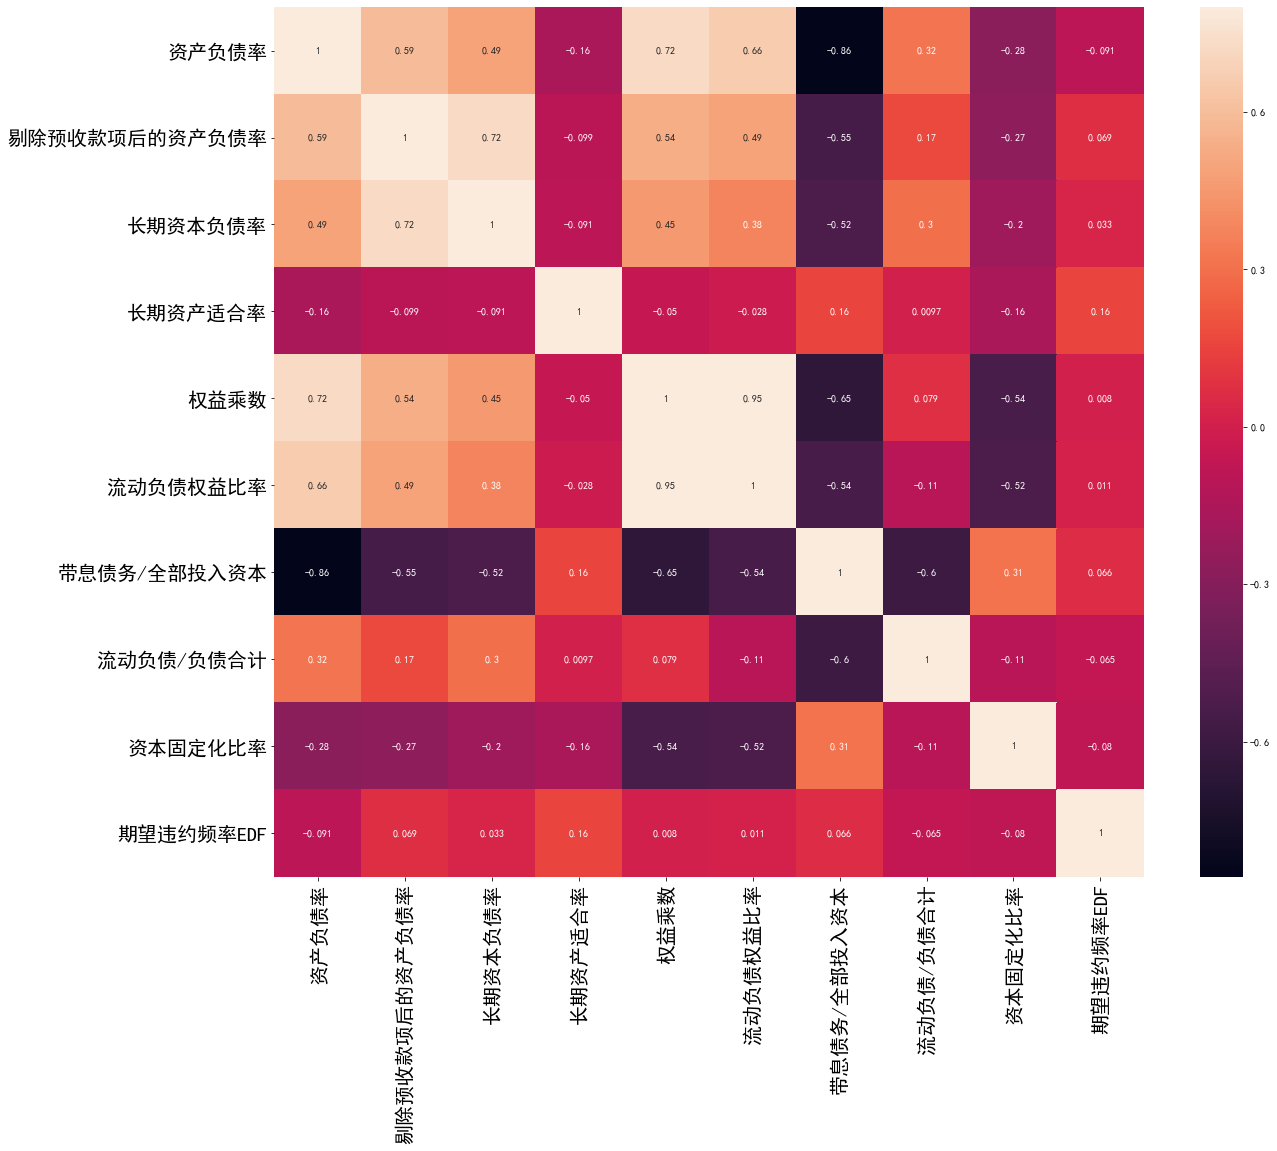

In [11]:
ax = plt.subplots(figsize=(20, 16))#调整画布大小
ax = sns.heatmap(corr, vmax=.8, square=True, annot=True)#画热力图   annot=True 表示显示系数
# 设置刻度字体大小
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## 三、结果解释

* 热力图右侧的刻度展示了不同相关系数对应的颜色深浅。从图中可以看出，·权益乘数·和·流动负债权益比率·之间的相关性较高，为0.95，即存在很强的多重共线性。在进行特征工程时可以考虑剔除二者中的一个变量，以免导致因多重共线性造成的过拟合。

* 从热力图的最后一列或最后一行可以看出，·长期资产适合率·和·期望违约频率·的相关系数相对最高，为0.16。因此，在进行违约风险评估建模时，可以考虑保留·长期资产适合率·这一变量。

### 相关阅读
* 数据可视化之树形图（原理+Python代码）
* 数据可视化之小提琴图（原理+Python代码）